### 1.1
What is the value of $\sqrt{2}^{\sqrt{2}^{{\sqrt{2}^{...}}}}$?
The closed form solution can be found by....
Below is the solution using Python.

In [16]:
import math
exponent = 1
for n in range(0,100):
    exponent = math.sqrt(2)**exponent
print exponent

2.0


### 3.1
You have a bag with two coins. One will come up heads 40% of the time, and the other will come up heads 60%. You pick a coin randomly, flip it and get a head. What is the probability it will be heads on the next flip?

In [34]:
import random as rnd
heads = 0
# n in range(0,1000):
#   coin1 = math.floor(rnd.random()/0.6)
#    heads += coin1
#print heads

def headsOrTails(probTails):
    if rnd.random() < probTails:
        return 0 #tails!
    return 1 #heads!

firstFlipIsAHeadCounter = 0
secondFlipIsAHeadCounter = 0
for trialCtr in range(0,100000):
    if rnd.random() < 0.5: # reach into bag and grab either coin
        probTails = 0.6  #heads 40% of the time
    else :
        probTails = 0.4 #heads 60% of the time
    coin = headsOrTails(probTails) #flip the coin!
    if coin == 1: # it's a head, beacuse it must be 1, not 0
        firstFlipIsAHeadCounter +=1
        secondFlipIsAHeadCounter += headsOrTails(probTails)
probEstimate = float(secondFlipIsAHeadCounter)/firstFlipIsAHeadCounter

#print secondFlipIsAHeadCounter,firstFlipIsAHeadCounter,probEstimate




26178 50181 0.521671548993


### 3.1 Object-oriented version

Here we solve the same problem, but introduce objects to Python

A simplistic approach to OO design is to identify the nouns in the problem description, and consider those to be potetital *classes*. A class is a template, sort of like a cookie cutter for stamping out identical objects, ready for use.

In this problem, we see **coin** and **purse** in the problem description. So let's make them into classes.

The *methods*of a class represent the actions we expect of the objects created from the class.

In [22]:
import numpy as np

class Coin(object): #we capitalize the name of classes.
    #almost always define a constructor, so that we can
    #create instances(objects) of Coin:
    def __init__(self,probHeads):
        self.probHeads = probHeads
    
    def flipIsHead(self):
        return np.random.random() < self.probHeads
    
    def nextNFlipsAreHeads(self, n):
        for i in range(n):
            if not self.flipIsHead(): #i.e it's a Tail:!                
                return False
            return True
    
class CoinBag(object):
    def __init__(self):
        self.coins = []
        
    def addCoin(self, coin):
        self.coins.append(coin)
    
    def pickRandomCoin(self):
        return np.random.choice(self.coins)
    
cb = CoinBag()
cb.addCoin(Coin(0.6))
cb.addCoin(Coin(0.4))

#print cb.pickRandomCoin()

firstFlipIsAHeadCounter = 0
secondFlipIsAHeadCounter = 0
for trialCtr in range(0,100000):
    randomCoin =  cb.pickRandomCoin()
    if randomCoin.flipIsHead():
        firstFlipIsAHeadCounter +=1
        if randomCoin.flipIsHead():
            secondFlipIsAHeadCounter += 1
probEstimate = float(secondFlipIsAHeadCounter)/firstFlipIsAHeadCounter
print probEstimate

#print secondFlipIsAHeadCounter,firstFlipIsAHeadCounter,probEstimate

0.52198365035


### 3.1
In front of you is a jar of 1000 coins. One of the coins has two heads, and the rest are fair coins. You choose a coin at random, and flip it ten times, getting all heads. What is the probability it is one of the fair coins?

In [39]:
cb = CoinBag()

print len(cb.coins)

cb.addCoin(Coin(1))

[cb.addCoin(Coin(0.5)) for n in range(999)]
print len(cb.coins)

useableTrialCtr = 0
fairCoinCtr = 0
for i in range(10000):
    randomCoin =  cb.pickRandomCoin()
    if randomCoin.nextNFlipsAreHeads(10):
        useableTrialCtr += 1
        if randomCoin.probHeads < 1:
            fairCoinCtr += 1
print fairCoinCtr, useableTrialCtr, float(fairCoinCtr)/useableTrialCtr


0
1000
5070 5078 0.998424576605


## Monte Hall Problem

You are a contestant on a game show. You have 3 doors in front of you. Behind two of the doors are goats. Unattractive goats. Behind the other door is a brand new Tesla. The game show host asks you to choose a door. After you do, he opens one of the remaining doors, and there stands a goat. The game show  host asks you if you'd like to switch doors. What do you do?

### 3.5
Starting at one vertex of a cube, and moving randomly from vertex to adjacent vertices, what is the expected number of moves until you reach the  vertex opposite from your starting point?

### 3.8
You have a spinner that generates random numbers that are uniform between 0 and 1. You sum the spins until the sum is greater than one. What is the expected number of spins?

In [43]:
import numpy as np

class Spinner(object):
    def __init__(self):
        self.total = 0
        self.spinCounter = 0
        
    def spin(self):
        self.total += np.random.random()
        self.spinCounter += 1
    
    def reset(self):
        self.total = 0
        self.spinCounter = 0
        
    def spinUntilGreaterThanOne(self):
        while self.total < 1:
            self.spin()
        answer = self.spinCounter
        self.reset()
        return answer
            
spinner = Spinner()
totalspins = 0
numTrials = 100
#for n in range(1000):
#   totalspins += spinner.spinUntilGreaterThanOne()
#print float(totalspins)/numTrials

trials = [spinner.spinUntilGreaterThanOne() for n in range(numTrials)]
#print trials
#print float(sum(trials))/numTrials


2.79


Populating the interactive namespace from numpy and matplotlib


(array([ 0.49,  0.35,  0.1 ,  0.02,  0.02,  0.02,  0.  ,  0.  ,  0.  ,  0.  ]),
 array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.]),
 <a list of 10 Patch objects>)

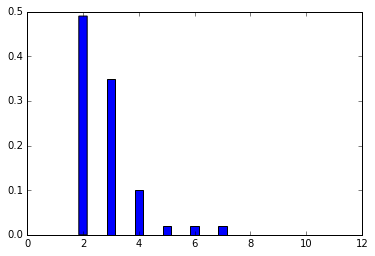

In [45]:
#need this to get figure to apppear in Jupyter
%pylab inline
import matplotlib.pyplot as plt

numBins = 10
plt.hist(trials, bins = numBins, normed = True,align = 'left',rwidth = 0.3, range =(2, 2+numBins))

### 4.4
You have a basket of $n$ assets. The asset returns are multivariate normal with zero mean. Correlation between any pair of assets is 1/2. What is the probability that $k$ of the assets will have positive return?

### 3.10
A stick is broken randomly into 3 pieces. What is the probability of the pieces being able to form a triangle?

### 3.11
A stick is broken randomly into two pieces. The larger piece is then broken randomly into two pieces. What is the probability of the pieces being able to form a triangle?

### 5.10
Suppose there are 36 students in the QFRM program, each assigned a unique integer from 1 to 36. Thirty-six quarters are laid out on a table in a row, heads up. Each student goes to the table, and if they are assigned the number $n$, they turn over the $n$th coin, the $2n$th coin, and so on. So, for example, the student who is assigned 15 will turn over the 15th and 30th coins. When everyone is done, how many tails are showing?